In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rawdata = pd.read_csv("/Users/ethan/Documents/GitHub/OpenSesame/LexicalDecision/LexicalDecision_1/data/Lab_report_01.csv")
df = rawdata[(rawdata['block'] == 'trial')]
df_means = df.groupby(['jatosStudyResultId', 'category', 'number_letters']).mean()
df_means.reset_index(inplace = True)
df_means.head()

In [3]:
#set(list(rawdata['subject_parity']))
len(set(list(rawdata['jatosStudyResultId'])))

17

In [4]:
#list(rawdata)
rawdata.shape

(3434, 40)

In [5]:
#df = rawdata[(rawdata['correct'] == 1) & (rawdata['block'] == 'trial')]
df = rawdata[(rawdata['block'] == 'trial')]
df.shape


(3332, 40)

In [6]:
df_means = df.groupby(['jatosStudyResultId', 'category', 'number_letters']).mean()
df_means.reset_index(inplace = True)
df_means.head()

,jatosStudyResultId,category,number_letters,acc,accuracy,avg_rt,correct,experiment_debug,experiment_parameters,experiment_pilot,...,response_time,screen_availableHeight,screen_availableWidth,screen_colorDepth,screen_height,screen_pixelDepth,screen_screenX,screen_screenY,screen_width,subject_nr
0,693,NW,3,86.333333,86.333333,617.000000,1.000000,0.0,0.0,0.0,...,567.666667,878.0,1440.0,24.0,900.0,24.0,81.0,22.0,1440.0,1.0
1,693,NW,4,87.200000,87.200000,609.000000,0.900000,0.0,0.0,0.0,...,573.500000,878.0,1440.0,24.0,900.0,24.0,81.0,22.0,1440.0,1.0
2,693,NW,5,88.846154,88.846154,592.153846,0.769231,0.0,0.0,0.0,...,623.307692,878.0,1440.0,24.0,900.0,24.0,81.0,22.0,1440.0,1.0
3,693,NW,6,86.176471,86.176471,607.000000,1.000000,0.0,0.0,0.0,...,633.411765,878.0,1440.0,24.0,900.0,24.0,81.0,22.0,1440.0,1.0
4,693,NW,7,85.333333,85.333333,614.166667,1.000000,0.0,0.0,0.0,...,699.666667,878.0,1440.0,24.0,900.0,24.0,81.0,22.0,1440.0,1.0


In [7]:
set(df_means['number_letters'])

{3, 4, 5, 6, 7}

<AxesSubplot:xlabel='avg_rt', ylabel='Density'>

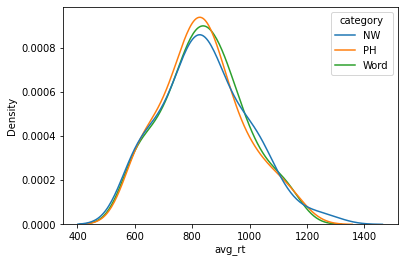

In [8]:
sns.kdeplot(x = 'avg_rt', hue = 'category', data = df_means)

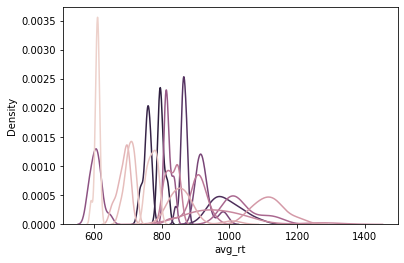

In [9]:

sns.kdeplot(x = 'avg_rt', hue = 'jatosStudyResultId', data = df_means)
plt.legend([],[], frameon=False)

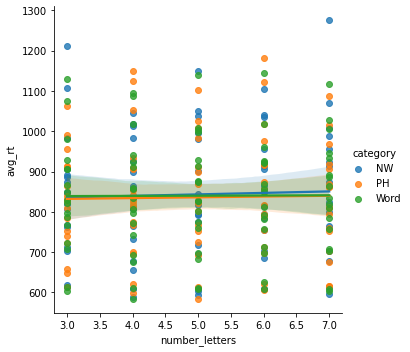

In [119]:
sns.lmplot(x = 'number_letters', y = 'avg_rt', hue = 'category', data = df_means)

<AxesSubplot:xlabel='number_letters', ylabel='avg_rt'>

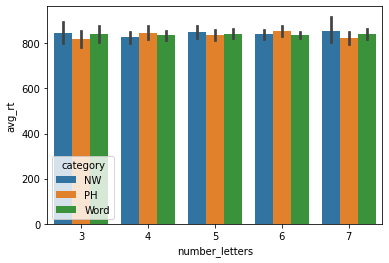

In [120]:
sns.barplot(x = 'number_letters', y = 'avg_rt', hue = 'category', data = df)

<AxesSubplot:xlabel='category', ylabel='acc'>

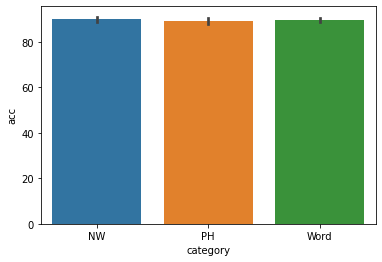

In [10]:
sns.barplot(x = 'category', y = 'acc', data = df_means)

In [13]:
import pingouin as pg

In [17]:
round(pg.rm_anova(dv='avg_rt', within='category', subject='jatosStudyResultId', data=df, detailed=True, effsize="np2"), 4)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,category,47.0947,2,23.5473,0.2174,0.8058,0.0134,0.8606
1,Error,3465.6732,32,108.3023,NaN,NaN,NaN,NaN


In [26]:

lm = pg.linear_regression(df_means[['number_letters']], df_means['avg_rt'])

In [28]:
round(lm,3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,829.479,33.279,24.925,0.00,0.0,-0.004,763.941,895.018
1,number_letters,2.044,6.404,0.319,0.75,0.0,-0.004,-10.569,14.657
